# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1-clustered")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A-clustered.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A-clustered.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1-clustered/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


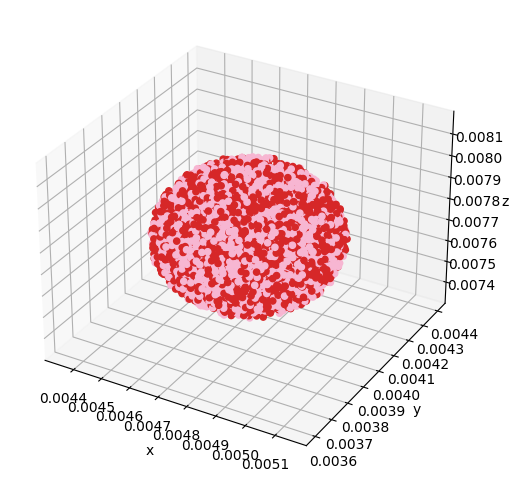

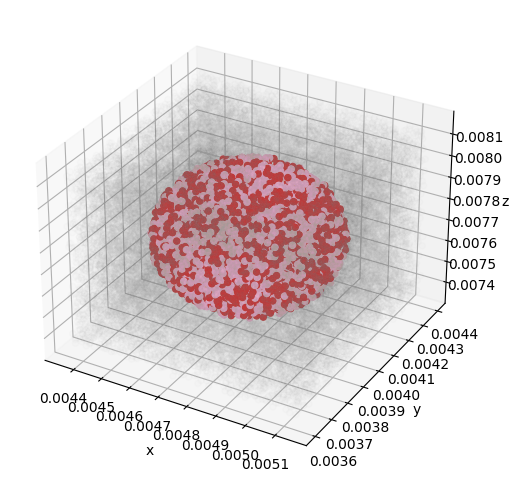

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1-clustered/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


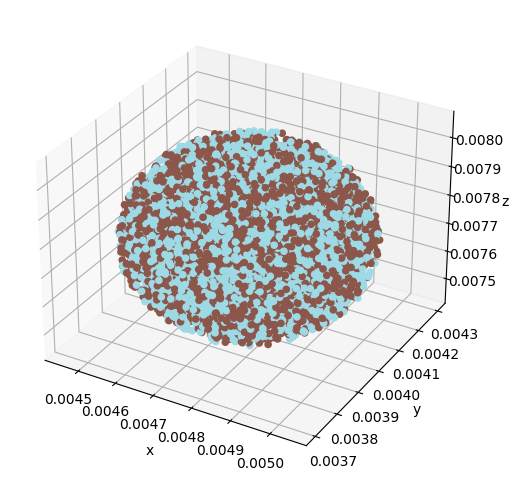

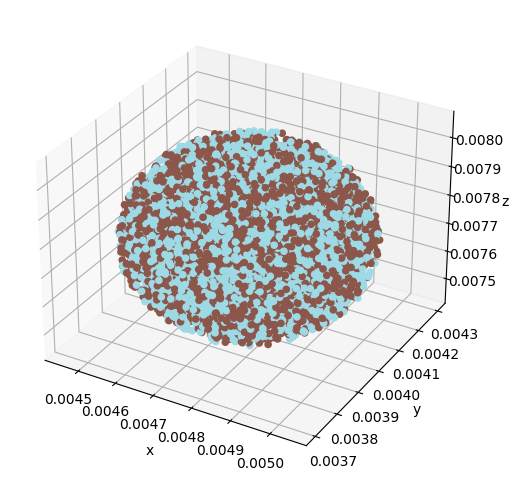

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

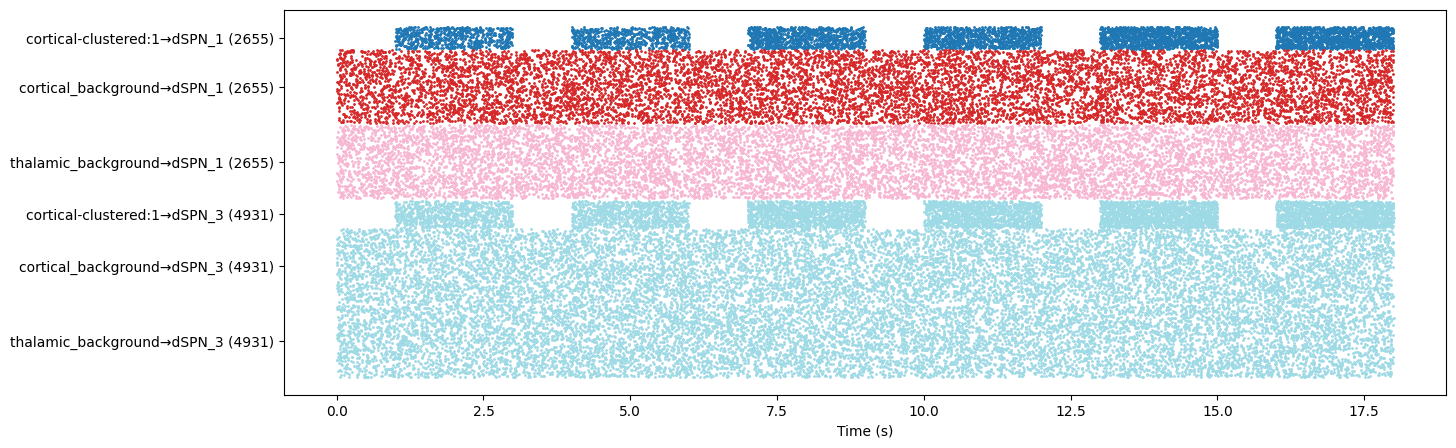

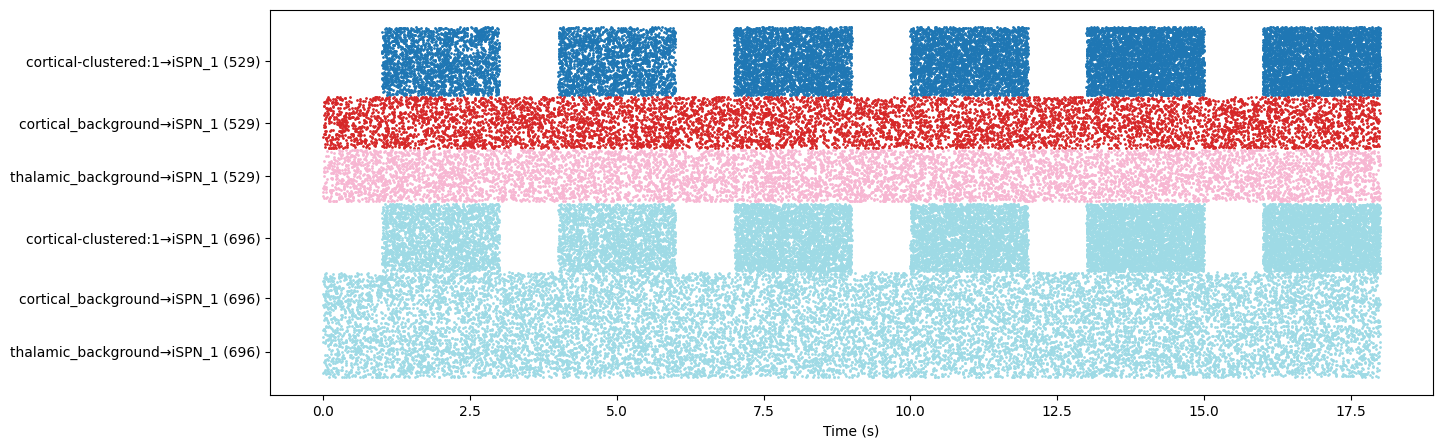

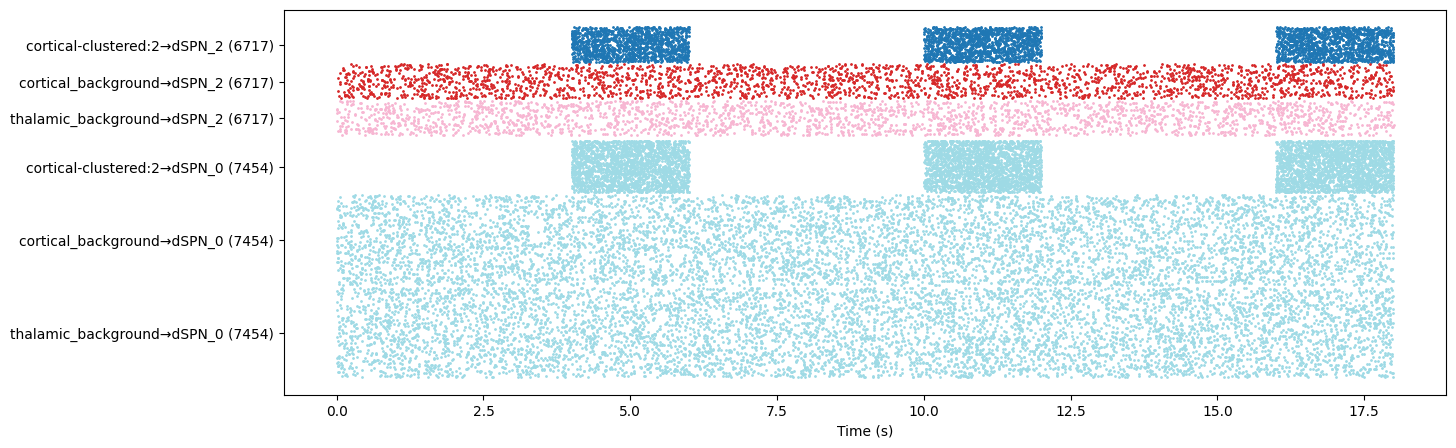

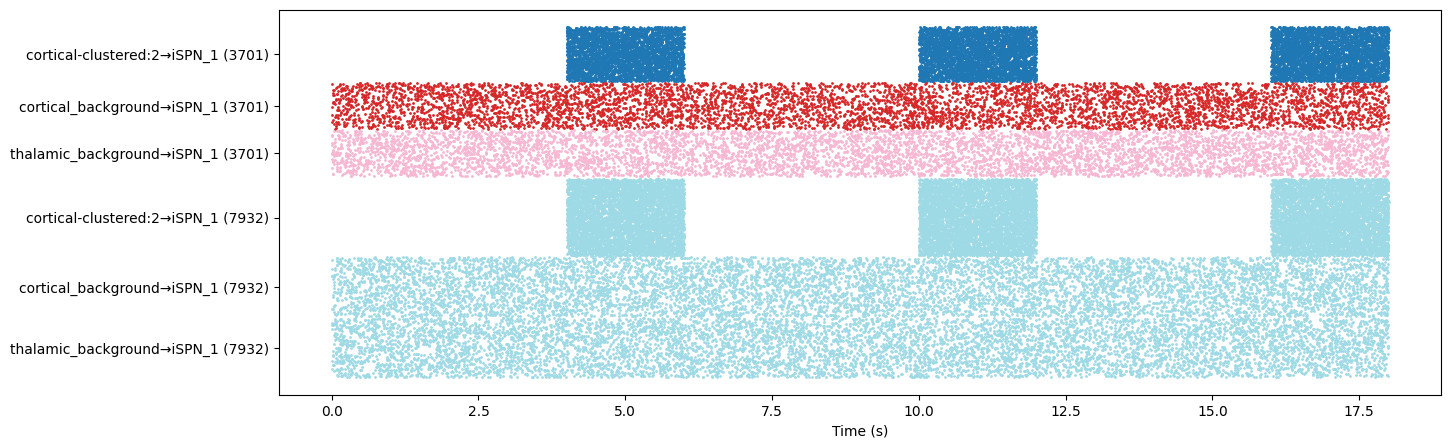

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1-clustered/simulation/output-with-synapses-sten_1-A-clustered.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3: (dSPN_0, p1863c9a5, mc710c1a4)
7: (dSPN_0, p1863c9a5, mf702205f)
10: (dSPN_0, pb0529fb9, m37886c78)
200: (dSPN_0, p1863c9a5, mf702205f)
567: (dSPN_0, pb0529fb9, mc710c1a4)
574: (dSPN_0, pb0529fb9, m9fda9b20)
576: (dSPN_0, p1863c9a5, m37886c78)
578: (dSPN_0, p7aa400d6, m37886c78)
929: (dSPN_0, p7aa400d6, m9fda9b20)
1116: (dSPN_0, pb0529fb9, mbb8e5b24)
1124: (dSPN_0, p1863c9a5, mf702205f)
1437: (dSPN_0, p8bf90d1f, mc710c1a4)
1438: (dSPN_0, p1863c9a5, mf702205f)
1439: (dSPN_0, p7517a0e9, m22be6817)
1441: (dSPN_0, p1863c9a5, m37886c78)
1443: (dSPN_0, p1863c9a5, mc710c1a4)
1804: (dSPN_0, pb0529fb9, m9fda9b20)
1811: (dSPN_0, pb0529fb9, m37886c78)
1815: (dSPN_0, pe6ec2d4b, m37886c78)
1817: (dSPN_0, pb0529fb9, mbb8e5b24)
1830: (dSPN_0, p7aa400d6, m22be6817)
1844: (dSPN_0, pe1ec8fbd, mbb8e5b24)
1847: (dSPN_0, 

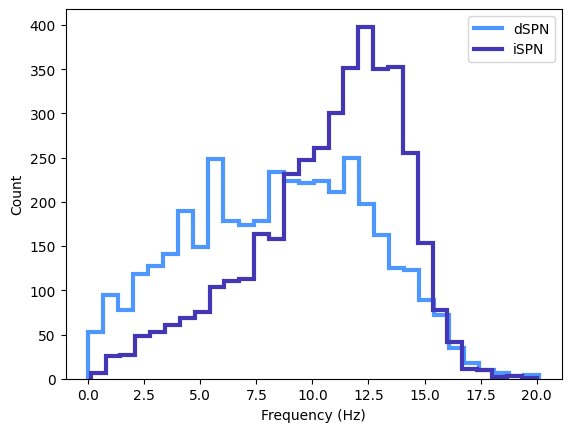

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1-clustered/figures/spike-frequency-pop-units1-2.pdf


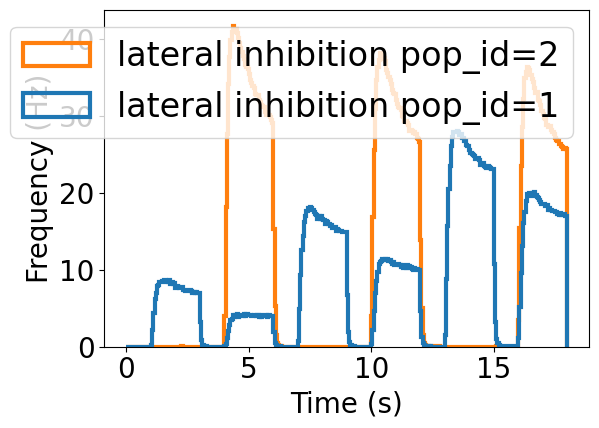

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1-clustered/simulation/output-no-synapses-sten_1-A-clustered.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
172: (dSPN_0, p7aa400d6, m9fda9b20)
192: (dSPN_0, p7aa400d6, mc710c1a4)
476: (iSPN_3, p57956f10, m1083058d)
542: (iSPN_3, p57956f10, m1083058d)
565: (dSPN_0, p8bf90d1f, m9fda9b20)
575: (dSPN_0, pd01ac450, mc710c1a4)
579: (dSPN_0, pe6ec2d4b, m22be6817)
755: (dSPN_0, p1863c9a5, mf702205f)
929: (dSPN_0, p7aa400d6, m9fda9b20)
947: (dSPN_0, pe6ec2d4b, mc710c1a4)
1430: (dSPN_0, p1863c9a5, mc710c1a4)
1450: (dSPN_0, p1863c9a5, mf702205f)
1755: (iSPN_3, p57956f10, m1083058d)
2496: (dSPN_0, pc8cbdb24, m22be6817)
2501: (dSPN_0, p8bf90d1f, mbb8e5b24)
2597: (iSPN_3, p57956f10, m1083058d)
2616: (dSPN_0, p1863c9a5, m37886c78)
2629: (dSPN_0, pb0529fb9, m9fda9b20)
2630: (dSPN_0, p7aa400d6, m9fda9b20)
2945: (iSPN_2, p3e12143b, mae7ae141)
3256: (dSPN_0, pe1ec8fbd, m22be6817)
3418: (dSPN_0, p7517a0e9, m9fda9b20)
3478: (dSPN_0

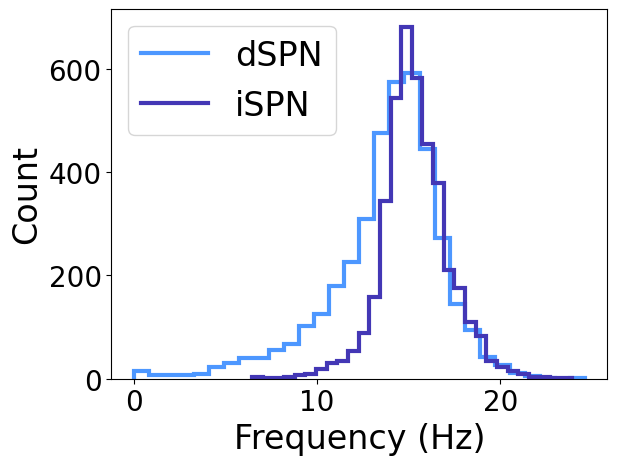

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1-clustered/figures/spike-frequency-pop-units1-2.pdf


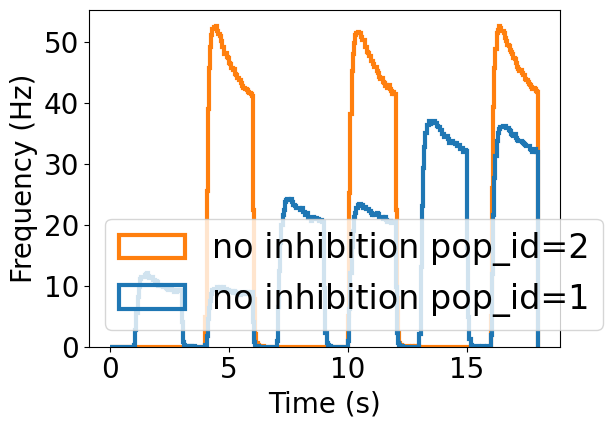

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1-clustered/figures/spike-frequency-pop-units1-2.pdf


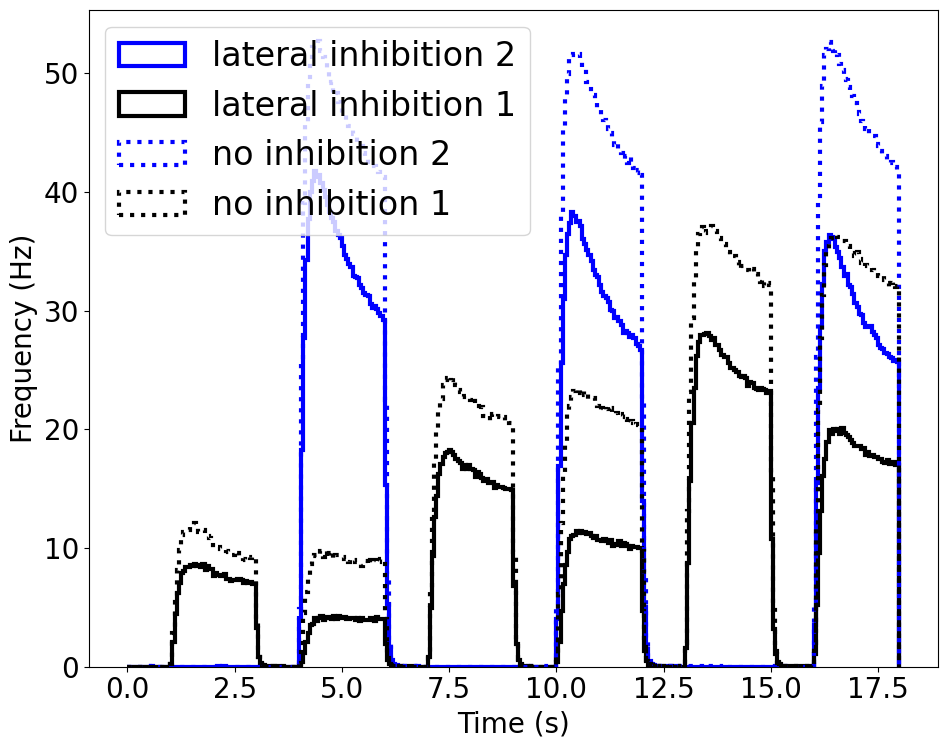

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8), colour=["black", "blue"])
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True, linestyle=":", colour=["black", "blue"])

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 7.36 +/- 0.08	Freq 2: 0.01 +/- 0.00
Freq 1: 4.03 +/- 0.06	Freq 2: 31.93 +/- 0.17
Freq 1: 15.57 +/- 0.12	Freq 2: 0.00 +/- 0.00
Freq 1: 10.33 +/- 0.12	Freq 2: 29.12 +/- 0.18
Freq 1: 24.08 +/- 0.14	Freq 2: 0.00 +/- 0.00
Freq 1: 17.66 +/- 0.16	Freq 2: 27.56 +/- 0.19


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 9.55 +/- 0.09	Freq 2: 0.00 +/- 0.00
Freq 1: 8.89 +/- 0.09	Freq 2: 43.66 +/- 0.10
Freq 1: 21.31 +/- 0.12	Freq 2: 0.00 +/- 0.00
Freq 1: 21.10 +/- 0.12	Freq 2: 43.76 +/- 0.10
Freq 1: 33.39 +/- 0.12	Freq 2: 0.01 +/- 0.00
Freq 1: 33.14 +/- 0.12	Freq 2: 44.10 +/- 0.11


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3720/4000	Neurons active 2: 19/4000
Neurons active 1: 3064/4000	Neurons active 2: 3977/4000
Neurons active 1: 3923/4000	Neurons active 2: 16/4000
Neurons active 1: 3668/4000	Neurons active 2: 3936/4000
Neurons active 1: 3957/4000	Neurons active 2: 12/4000
Neurons active 1: 3839/4000	Neurons active 2: 3915/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3753/4000	Neurons active 2: 15/4000
Neurons active 1: 3670/4000	Neurons active 2: 3991/4000
Neurons active 1: 3937/4000	Neurons active 2: 10/4000
Neurons active 1: 3927/4000	Neurons active 2: 3983/4000
Neurons active 1: 3955/4000	Neurons active 2: 12/4000
Neurons active 1: 3958/4000	Neurons active 2: 3977/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1-clustered/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1-clustered/input-spikes.hdf5
Loading ../networks/sten_1-clustered/simulation/output-with-synapses-sten_1-A-clustered.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3: (dSPN_0, p1863c9a5, mc710c1a4)
7: (dSPN_0, p1863c9a5, mf702205f)
10: (dSPN_0, pb0529fb9, m37886c78)
200: (dSPN_0, p1863c9a5, mf702205f)
567: (dSPN_0, pb0529fb9, mc710c1a4)
574: (dSPN_0, pb0529fb9, m9fda9b20)
576: (dSPN_0, p1863c9a5, m37886c78)
578: (dSPN_0, p7aa400d6, m37886c78)
929: (dSPN_0, p7aa400d6, m9fda9b20)
1116: (dSPN_0, pb0529fb9, mbb8e5b24)
1124: (dSPN_0, p1863c9a5, mf702205f)
1437: (dSPN_0, p8bf90d1f, mc710c1a4)
1438: (dSPN_0, p1863c9a5, mf702205f)
1439: (dSPN_0, p7517a0e9, m22be6817)
1441: (dSPN_0, p1863c9a5, m37886c78)
1443: (dSPN_0, p1863c9a5, mc710c1a4)
1804: (dSPN_0, pb0529fb9, m9fda9b20)
1811: (dSPN_0, pb0529fb9, m37886c78)
1815: (

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 5  6 15 16 17 18 22 24 26 27 28 30 32 33 36 38 41 42 44 45 46 47 49 52
 56 57 60 64 67 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-iSPN.pdf


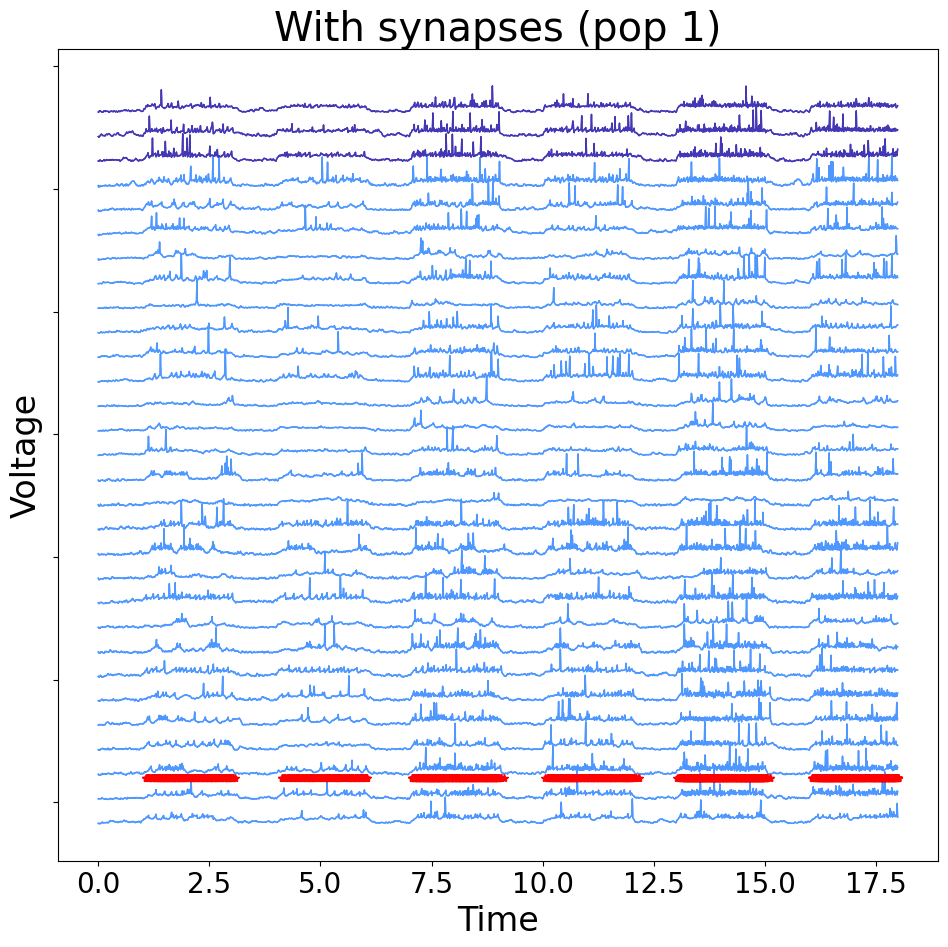

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  4  7  8  9 10 11 12 13 14 19 20 21 23 25 29 31 34 35 37 39
 40 43 48 50 51 53]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-traces.pdf


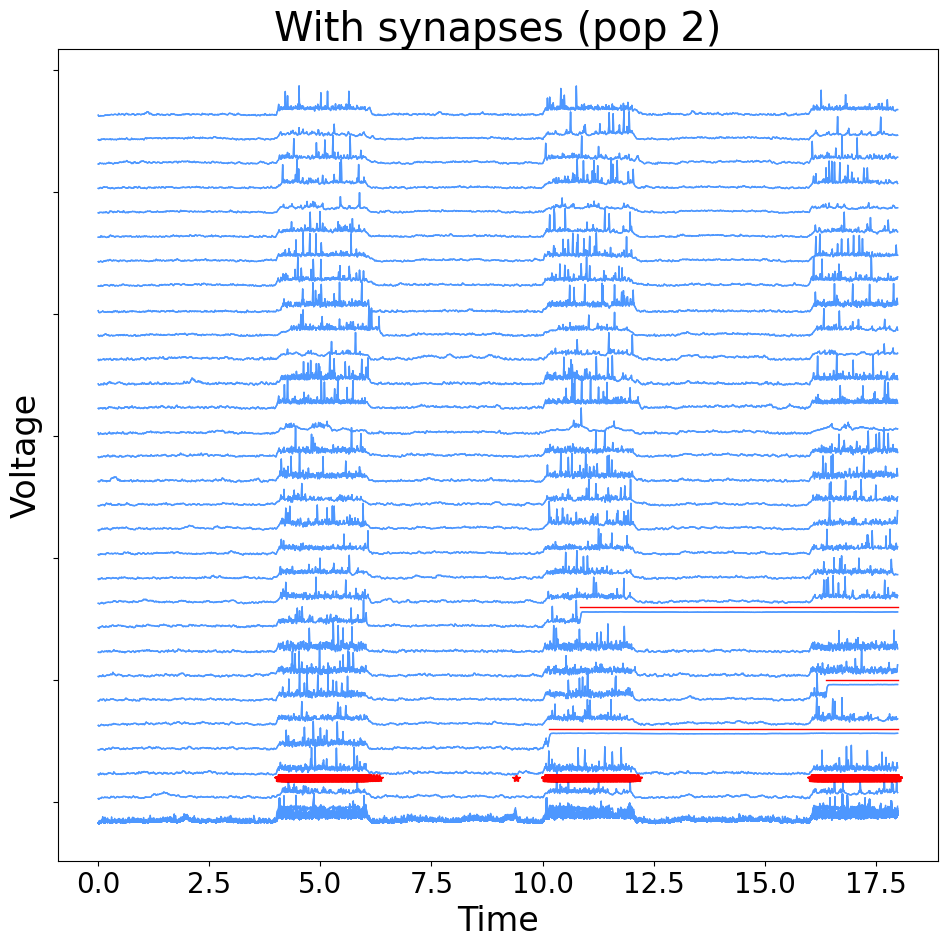

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1-clustered/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1-clustered/input-spikes.hdf5
Loading ../networks/sten_1-clustered/simulation/output-no-synapses-sten_1-A-clustered.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
172: (dSPN_0, p7aa400d6, m9fda9b20)
192: (dSPN_0, p7aa400d6, mc710c1a4)
476: (iSPN_3, p57956f10, m1083058d)
542: (iSPN_3, p57956f10, m1083058d)
565: (dSPN_0, p8bf90d1f, m9fda9b20)
575: (dSPN_0, pd01ac450, mc710c1a4)
579: (dSPN_0, pe6ec2d4b, m22be6817)
755: (dSPN_0, p1863c9a5, mf702205f)
929: (dSPN_0, p7aa400d6, m9fda9b20)
947: (dSPN_0, pe6ec2d4b, mc710c1a4)
1430: (dSPN_0, p1863c9a5, mc710c1a4)
1450: (dSPN_0, p1863c9a5, mf702205f)
1755: (iSPN_3, p57956f10, m1083058d)
2496: (dSPN_0, pc8cbdb24, m22be6817)
2501: (dSPN_0, p8bf90d1f, mbb8e5b24)
2597: (iSPN_3, p57956f10, m1083058d)
2616: (dSPN_0, p1863c9a5, m37886c78)
2629: (dSPN_0, pb0529fb9, m9fda9b20)
2630:

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 5  6 15 16 17 18 22 24 26 27 28 30 32 33 36 38 41 42 44 45 46 47 49 52
 56 57 60 64 67 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-iSPN.pdf


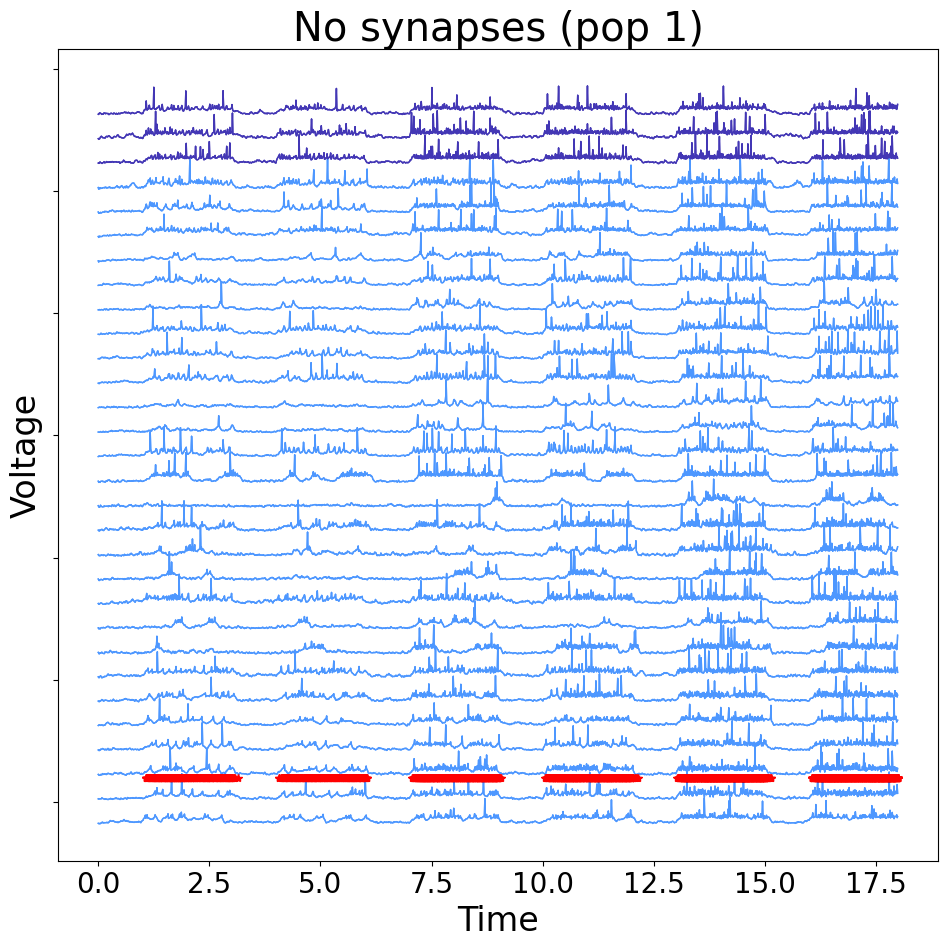

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  4  7  8  9 10 11 12 13 14 19 20 21 23 25 29 31 34 35 37 39
 40 43 48 50 51 53]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-traces.pdf


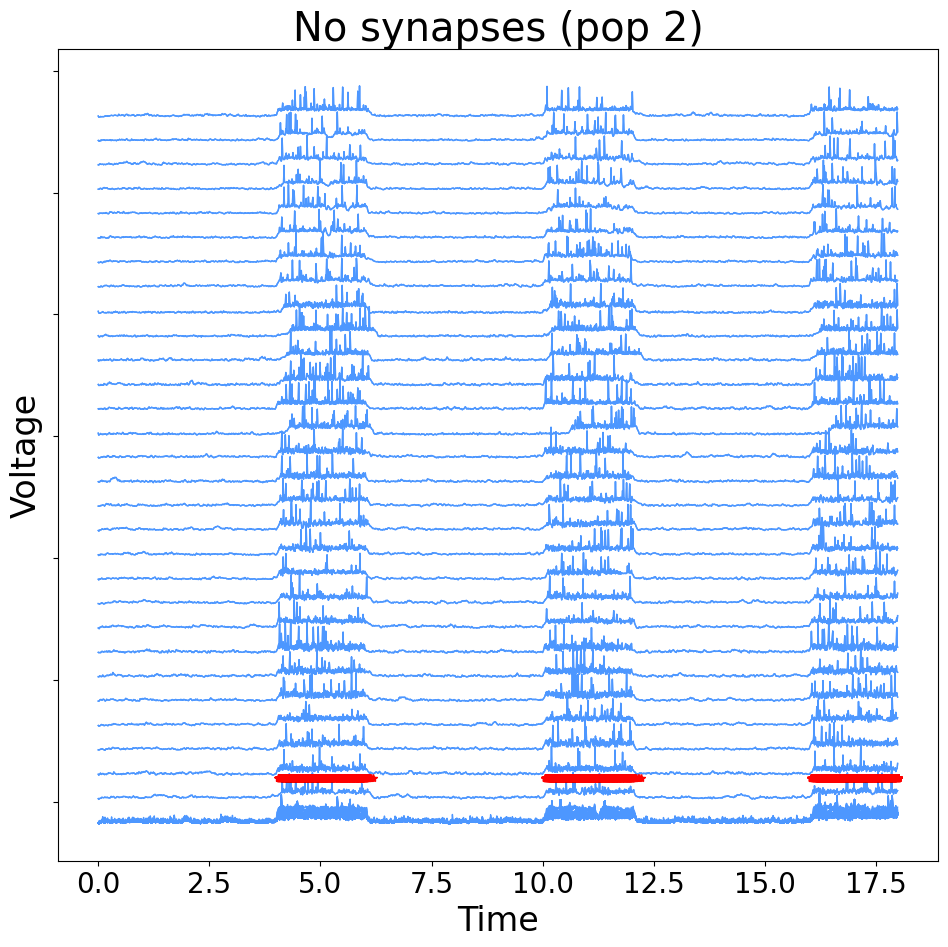

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 578 1437 1438 1439 1804 1811 1830 2173 2611 2621 2622 3016 3055 3113
 3474 3479 3484 4125 4128 4152 4841 5162 5164 5169 5178 5398 5622 5705
 5721 5735 5739 5743 6630 7239 7774]
Plotted 35 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-traces.pdf


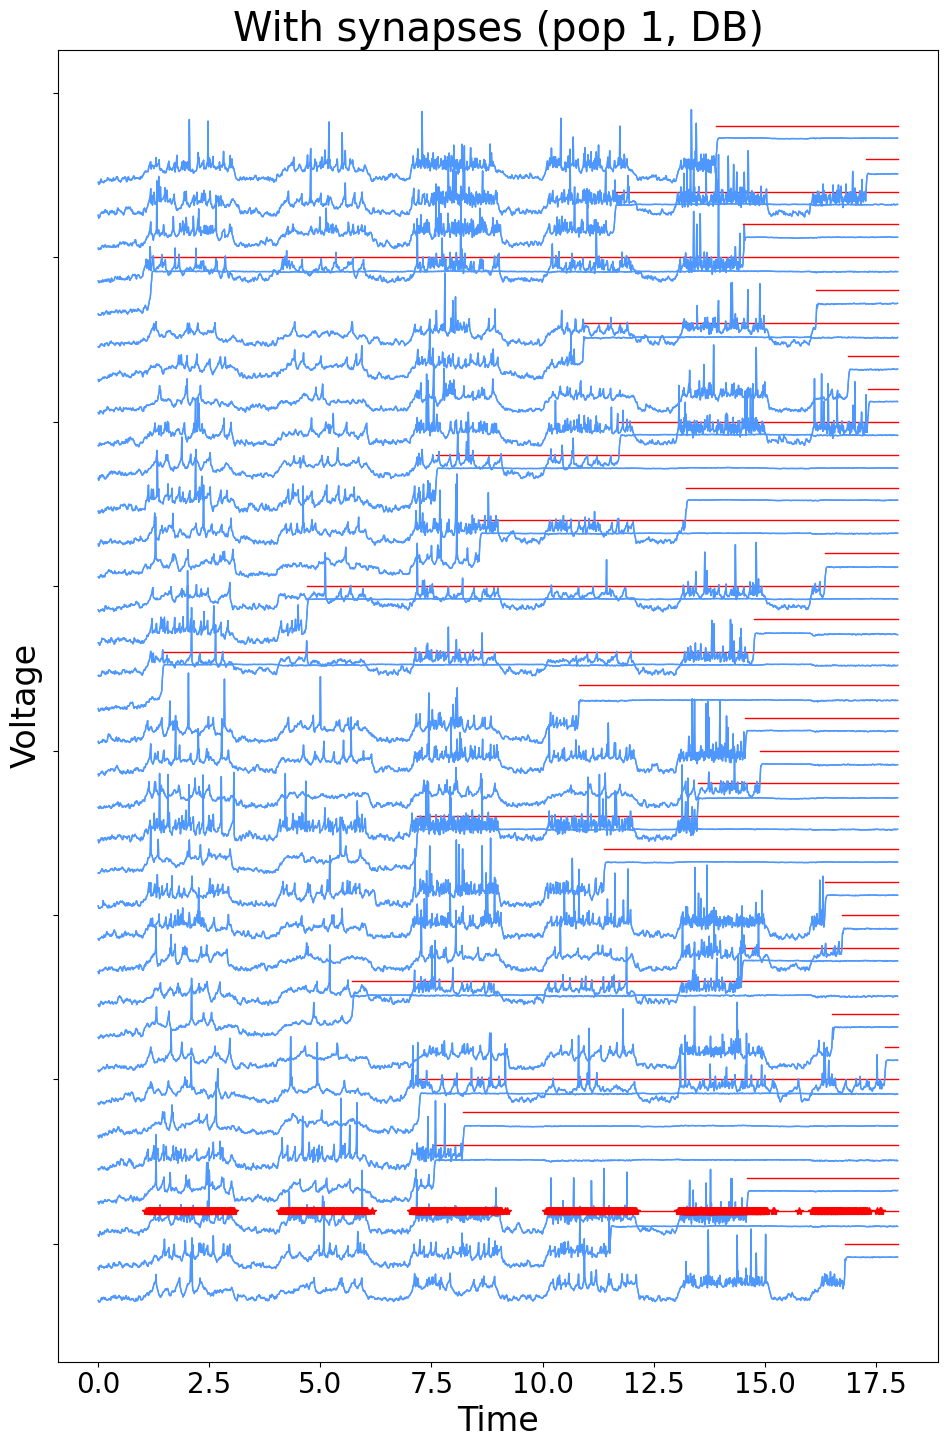

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [   3    7   10  200  567  574  576  929 1116 1124 1441 1443 1815 1817
 1844 1847 2165 2175 2187 2189 2503 2619 2645 2765 3195 3273 3455 3482
 3820 3825 3828 3836 4115 4134 4149 4462 4803 4836 4845 5624 5720 5737
 5744 5750 5753 6319 6330 6917 7326 7452 7453 7461 7470 7471 7762 7881]
Plotted 56 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-traces.pdf


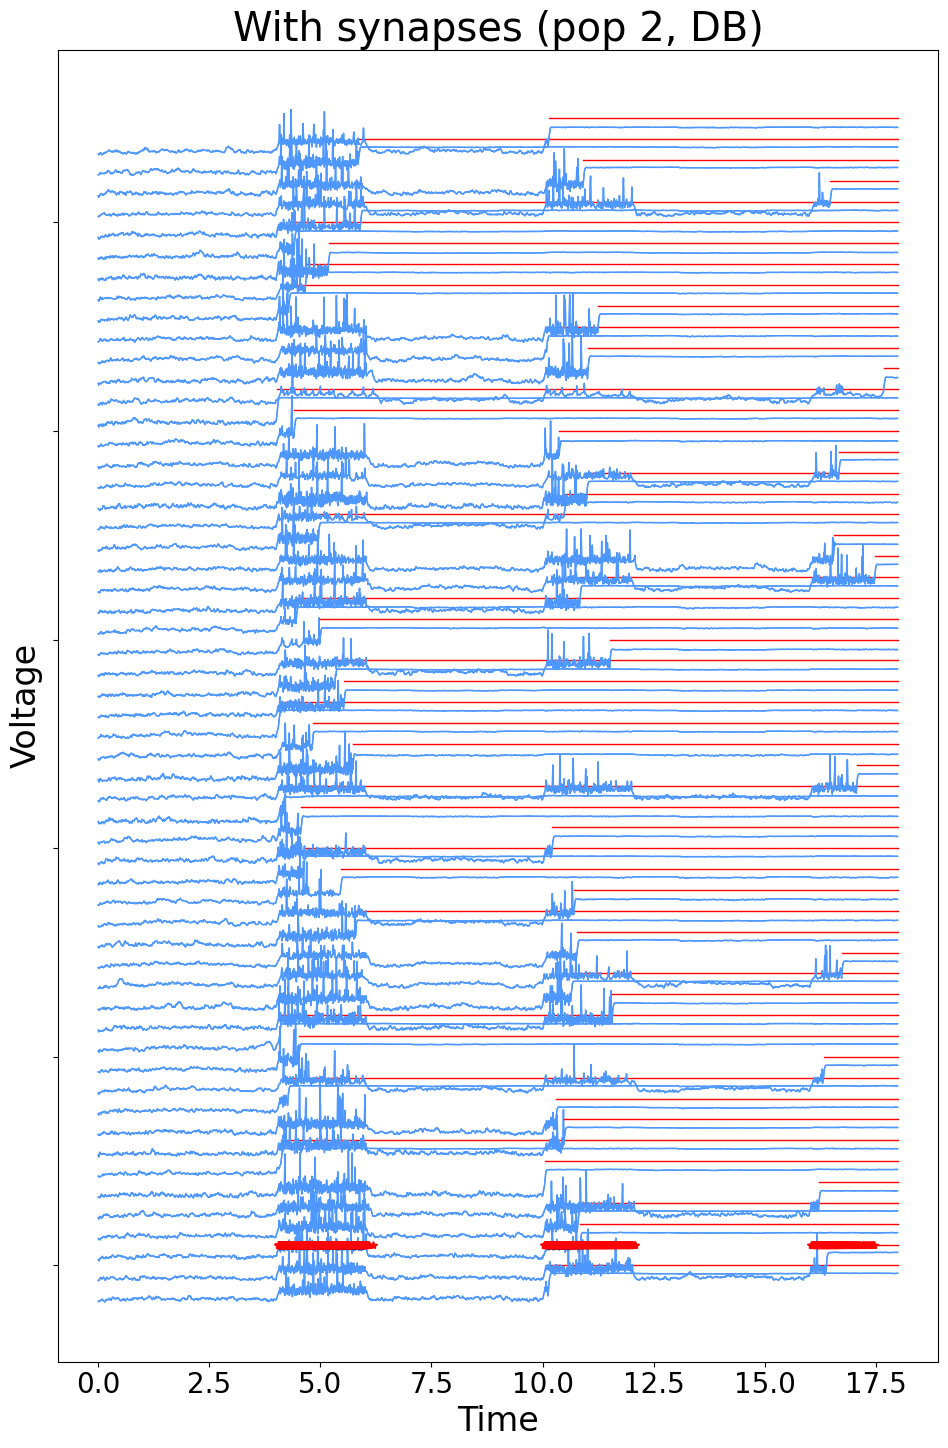

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 172  192  476  542  579  755  947 1450 1755 2496 2616 2629 2630 3418
 3478 4121 4130 4138 4850 5170 5622 6188 6326 6339 6636 7059 7327 7462
 7882]
Plotted 29 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-iSPN.pdf


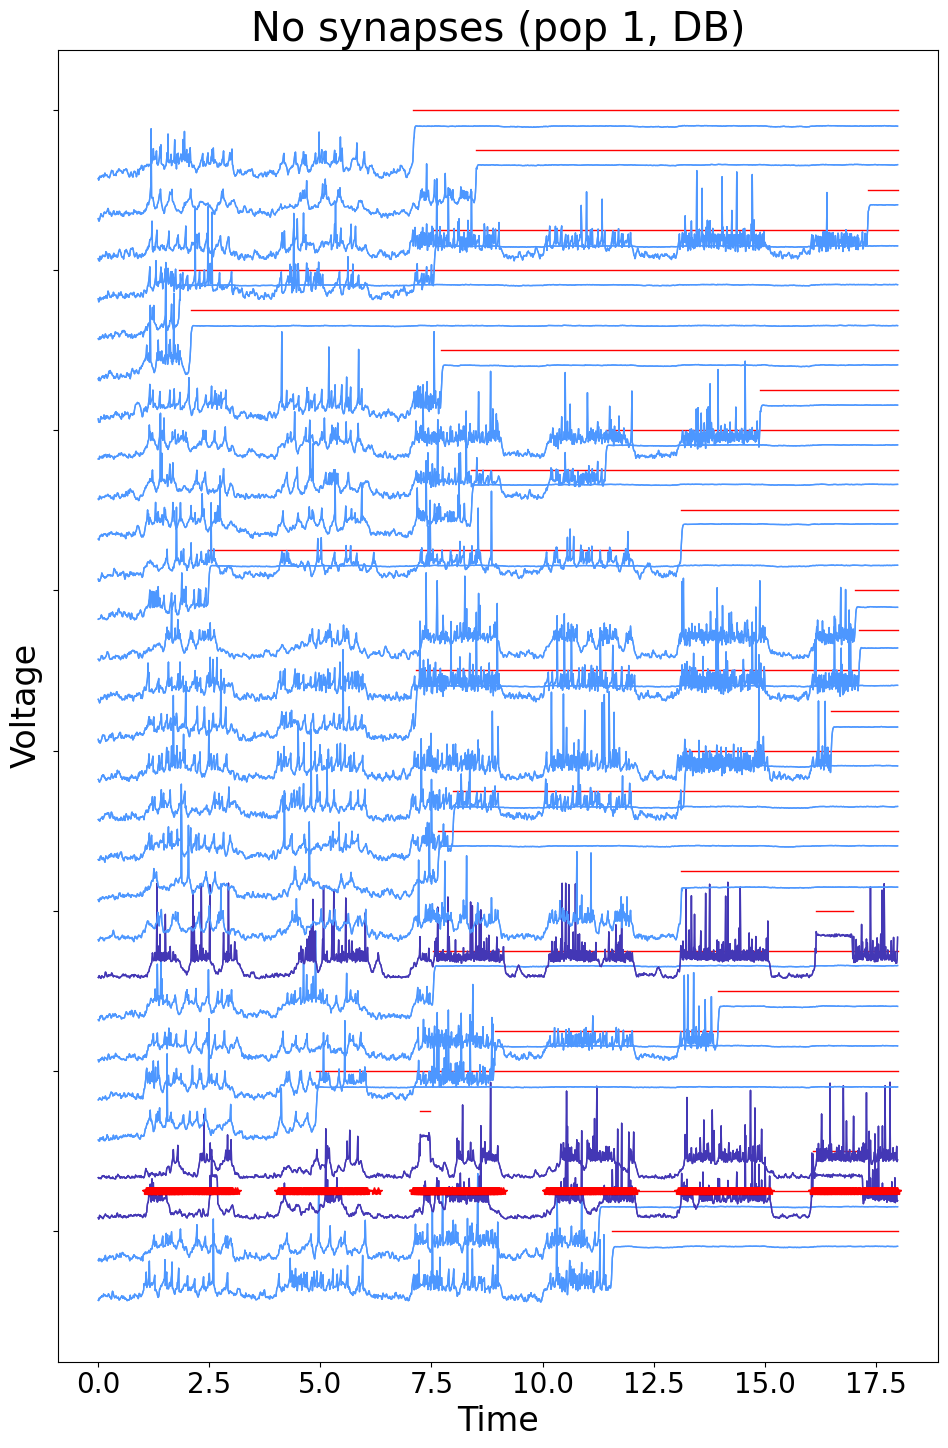

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 565  575  929 1430 2501 2597 2945 3256 3809 3941 4134 5408 5618 6330
 6916 6917 7057 7235 7881]
Plotted 19 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1-clustered/figures/Network-voltage-trace--dSPN-iSPN.pdf


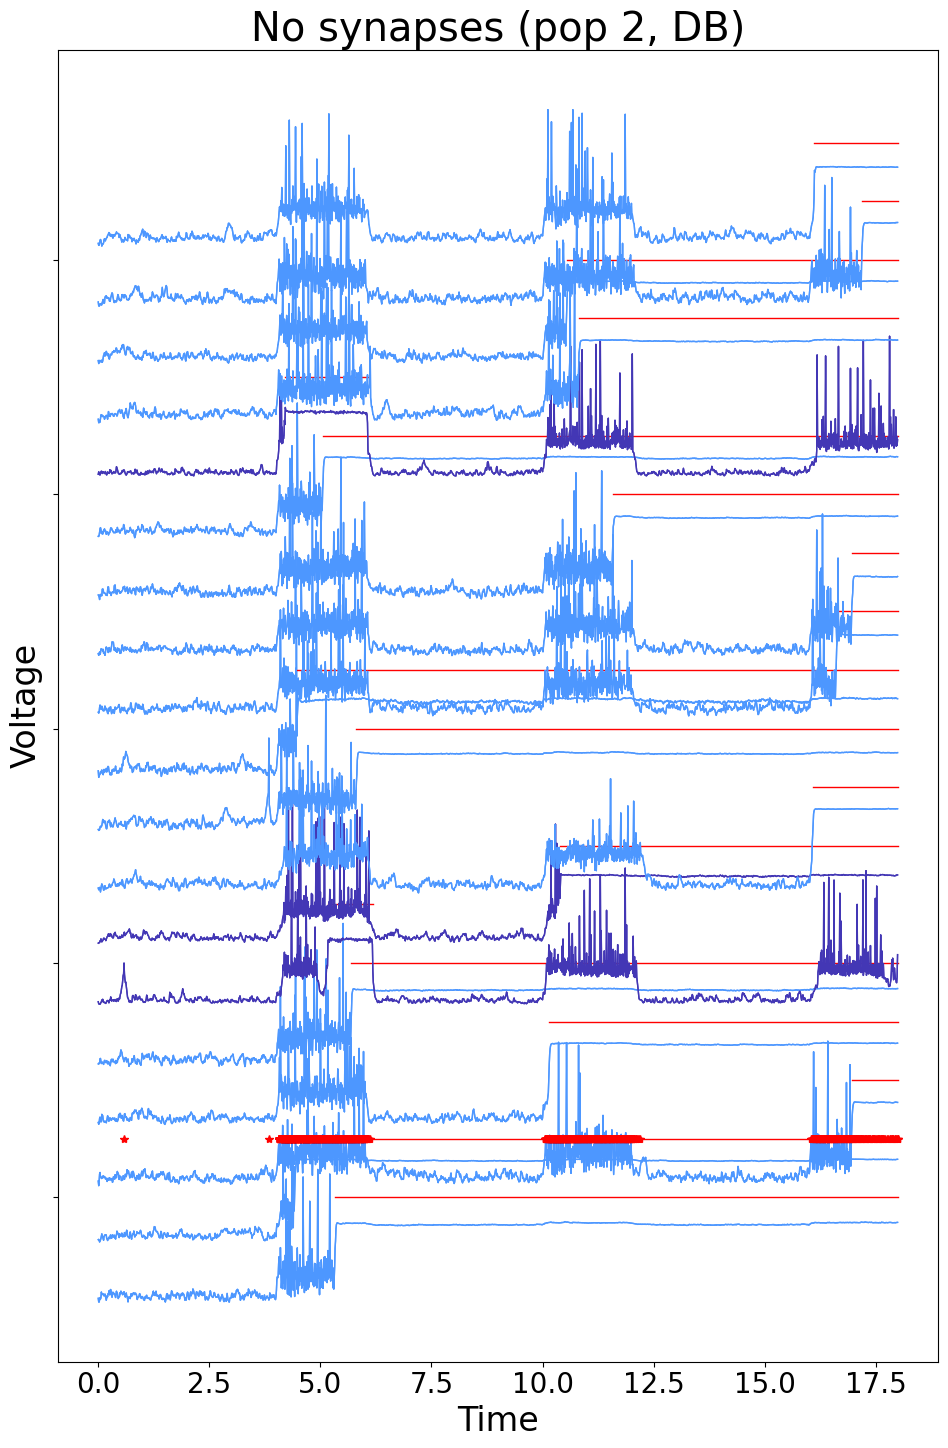

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)